# 5. Autres modèles de réduction de dimension
Compraison ACP avec modèles non linéaires.

Code source : https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

In [1]:
%matplotlib inline

In [2]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
from time import time, strftime, gmtime

# Heure démarrage
t0 = time()

In [4]:
# Données digits 8*8 pixels, échantillon de chiffres de 0 à 5
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [5]:
# Dimensions dataset
n, k = digits['data'].shape
print(n, 'digits de taille ', k)

1083 digits de taille  64


In [6]:
# Scale and visualize the embedding vectors
def plot_embedding(position, X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    #plt.figure()
    ax = plt.subplot(*position)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Text(0.5, 1.0, 'First digit')

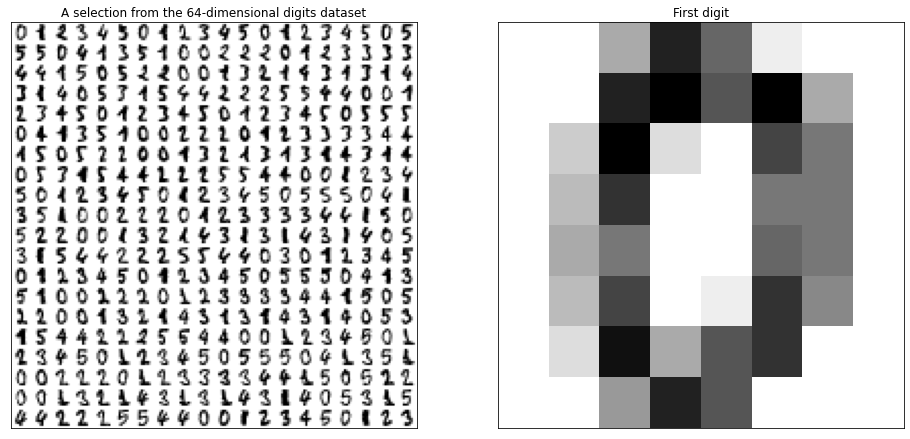

In [7]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1, aspect='equal')
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

plt.subplot(1, 2, 2, aspect='equal')
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('First digit')

Computing PCA projection
Computing Isomap projection
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63544e-06
Computing t-SNE embedding


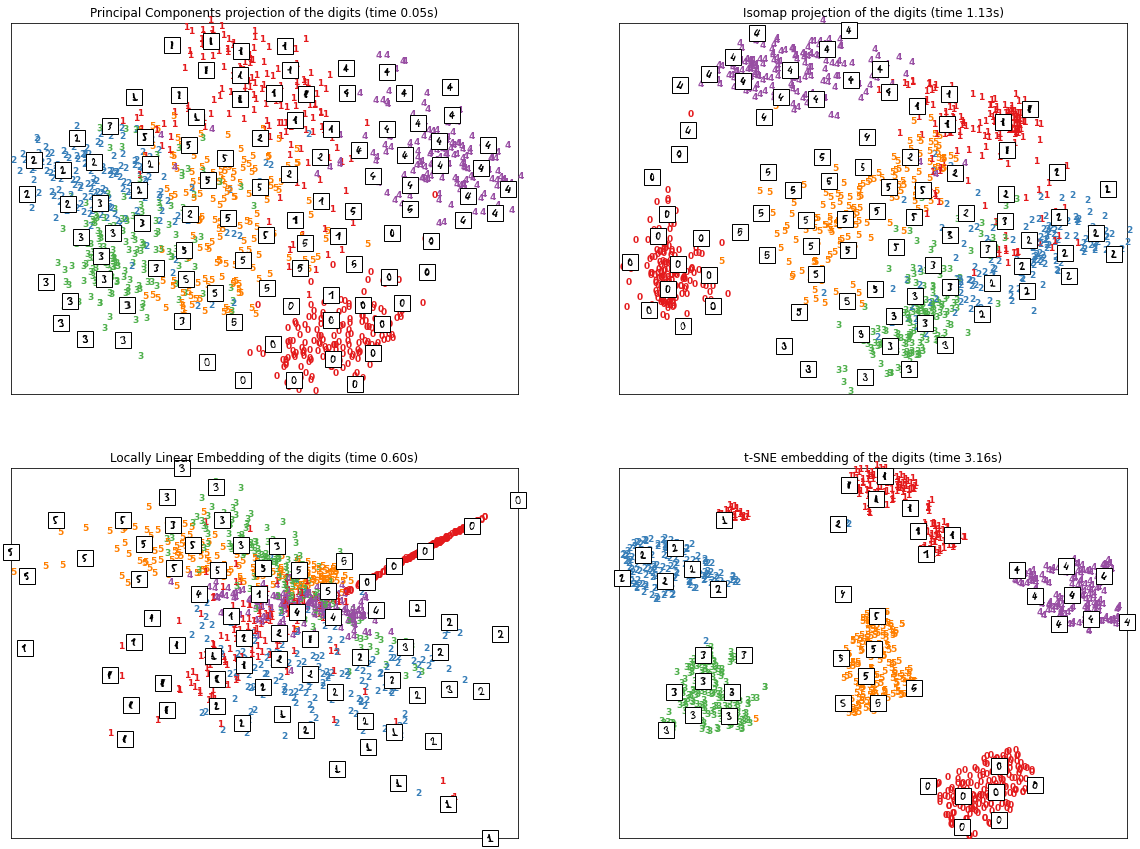

In [8]:
plt.figure(figsize=(20, 15))

# Projection on to the first 2 principal components
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.KernelPCA(n_components=2, kernel='linear').fit_transform(X)
plot_embedding((2, 2, 1), X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

# Isomap projection of the digits dataset
print("Computing Isomap projection")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2
                        ).fit_transform(X)
print("Done.")
plot_embedding((2, 2, 2), X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding((2, 2, 3), X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding((2, 2, 4), X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [9]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 14.433874 sec
computing time : 00:00:14
